In [102]:
import agentpy as ap

if it bull market condition : 

Total token supply will be 4%, 2% goes to validator incentives and 2% goes to community treasury 
also the transaction rate will be very high and transaction fee will be high 
validator_incentives will be high 
it will be high adoption levels


if it bear market condition : 

Total token supply will be 0.2%, 0.1% goes to validator incentives and 0.1% goes to community treasury 
also the transaction rate will be very low and transaction fee will be low 
validator_incentives will be low
it will be low adoption levels

if it Base market condition : 

Total token supply will be 2%, 1% goes to validator incentives and 1% goes to community treasury 
also the transaction rate will be medium and transaction fee will be medium 
validator_incentives will be low
it will be medium adoption levels

In [154]:
class Staker(ap.Agent):
    def setup(self, initial_supply, staking_provision):
        self.holding = initial_supply * 0.35
        self.staking_provision = 0.35
        self.staking_rewards = 0  # To track staking rewards
        self.unstaked_amount = 0  # To track unstaking amounts
        self.staked_amount = 0  # To track staked amounts

    def stake(self, amount):
        self.holding += amount
        self.staked_amount += amount
        self.staking_rewards += amount * self.staking_provision

    def unstake(self, amount):
        if self.holding >= amount:
            self.holding -= amount
            self.unstaked_amount += amount
            return amount
        return 0


class Validator(ap.Agent):
    def setup(self):
        self.operational_cost = 10000
        self.performance = 1.0
        self.validator_incentives = 0.02 

    def validate(self):
        # Placeholder validation logic
        return self.performance

In [157]:
class OHM(ap.Model):
    def setup(self):
        # Initialize an attribute with parameter requirements
        self.initial_supply = 21e9
        self.yearly_emissions = 0.04  # 4% for the first decade
        self.validator_incentives = 0.02
        self.community_treasury = 0.02
        self.num_validators_L1 = 100
        self.num_validators_middleware = 20
        self.operational_cost_per_validator = 10000
        self.staking_provision = 0.35
        self.incentivization_scenarios = ['scenario1', 'scenario2', 'scenario3']
        self.adoption_scenarios = ['low', 'medium', 'high']
        self.current_step = 0

        # Model components
        self.stakers = ap.AgentList(self, 100, Staker, initial_supply=self.initial_supply, staking_provision=self.staking_provision)
        self.validators_L1 = ap.AgentList(self, self.num_validators_L1, Validator)
        self.validators_middleware = ap.AgentList(self, self.num_validators_middleware, Validator)
        self.treasury = 0
        self.total_supply = self.initial_supply * (1 + self.yearly_emissions)  # Initialize total_supply
        

    def staker_behaviors(self):
        # Staker behaviors
        for staker in self.stakers:
            staking_amount = staker.holding * self.staking_provision
            staker.stake(staking_amount)

            if self.p.economic_outlook_scenarios == 'bull':
                # Adjust parameters for bull market
                staking_reward_increase_percentage = 0.2
                additional_rewards = staker.holding * self.staking_provision * staking_reward_increase_percentage
                staker.stake(additional_rewards)
                staker.staking_provision *= 1.1  # Increase staking rewards

            if self.p.economic_outlook_scenarios == 'bear':
                staker.staking_provision *= 0.8  # Decrease staking rewards
                staker.unstake(0.1 * staker.holding)  # Unstake 10% of holding


    def validator_behaviors(self, validators):
        # Validator behaviors
        for validator in self.validators_L1:
            validation_reward = validator.validate() * self.validator_incentives
            self.treasury += validation_reward
            validator.operational_cost += self.operational_cost_per_validator

            # Additional behaviors in a bull market
            if self.p.economic_outlook_scenarios == 'bull':
                # Adjust parameters for bull market
                validator.validator_incentives *= 1.2  # Increase validation rewards
                validator.operational_cost *= 0.9  # Decrease operational costs
                validator.performance *= 1.1  # Increase performance

            # Additional behaviors in a bear market
            if self.p.economic_outlook_scenarios == 'bear':
                # Adjust parameters for bear market
                validator.validator_incentives *= 0.8  # Decrease validation rewards
                validator.operational_cost *= 1.2  # Increase operational costs
                validator.performance *= 0.9  # Decrease performance


        for validator in self.validators_middleware:
            validation_reward = validator.validate() * self.validator_incentives
            self.treasury += validation_reward
            validator.operational_cost += self.operational_cost_per_validator

            # Additional behaviors in a bull market
            if self.p.economic_outlook_scenarios == 'bull':
                # Adjust parameters for bull market
                validator.validator_incentives *= 1.2  # Increase validation rewards
                validator.operational_cost *= 0.9  # Decrease operational costs
                validator.performance *= 1.1  # Increase performance

            # Additional behaviors in a bear market
            if self.p.economic_outlook_scenarios == 'bear':
                # Adjust parameters for bear market
                validator.validator_incentives *= 0.8  # Decrease validation rewards
                validator.operational_cost *= 1.2  # Increase operational costs
                validator.performance *= 0.9  # Decrease performance

    def step(self):
        print(f"\n Current economic outlook scenarios: {self.p.economic_outlook_scenarios}")

        if self.p.economic_outlook_scenarios == 'bull':
            print('bull')
            self.validator_incentives *= 1.2
            self.community_treasury += 0.02 * self.total_supply
            self.operational_cost_per_validator *= 0.9
            self.transaction_rate_L1 = 0.2
            self.transaction_rate_middleware = 0.1
            self.transaction_fee_L1 = 0.02
            self.transaction_fee_middleware = 0.01
            self.adoption_level = 'high'
            
            self.staker_behaviors()
            self.validator_behaviors(self.validators_L1)
            self.validator_behaviors(self.validators_middleware)

        elif self.p.economic_outlook_scenarios == 'bear':
            print('bear')
            self.validator_incentives *= 0.8
            self.community_treasury += 0.001 * self.total_supply
            self.transaction_rate_L1 = 0.05
            self.transaction_rate_middleware = 0.02
            self.transaction_fee_L1 = 0.005
            self.transaction_fee_middleware = 0.002
            self.adoption_level = 'low'

            self.staker_behaviors()
            self.validator_behaviors(self.validators_L1)
            self.validator_behaviors(self.validators_middleware)

        else:  # Base market condition
            print('base')
            self.validator_incentives *= 0.9
            self.community_treasury += 0.01 * self.total_supply
            self.transaction_rate_L1 = 0.1
            self.transaction_rate_middleware = 0.05
            self.transaction_fee_L1 = 0.01
            self.transaction_fee_middleware = 0.005
            self.adoption_level = 'medium'

            self.staker_behaviors()
            self.validator_behaviors(self.validators_L1)
            self.validator_behaviors(self.validators_middleware)

        yearly_emission = self.total_supply * self.yearly_emissions
        self.total_supply += min(yearly_emission, 0.04 * self.total_supply)

        self.current_step += 1

    def update(self):

        staking_total = sum(staker.holding * self.staking_provision for staker in self.stakers)
        unstaking_total = sum(staker.unstake(0.1 * staker.holding) for staker in self.stakers)  # Assuming 10% unstaking
        stakers_net_supply = staking_total - unstaking_total

        print(f"Stakers total supply: {stakers_net_supply}")
        self.record('Stakers_Net_Supply', stakers_net_supply)


        # Update staking rewards
        total_staking_rewards = sum(staker.staking_rewards for staker in self.stakers)
        self.record('Total_Staking_Rewards', total_staking_rewards)

        # Update unstaking amounts
        total_unstaking_amount = sum(staker.unstaked_amount for staker in self.stakers)
        self.record('Total_Unstaking_Amount', total_unstaking_amount)

        # Calculate and record staking yield
        staking_yield = (total_staking_rewards / staking_total) * 100
        self.record('Staking_Yield', staking_yield)

        # Update staking provisions
        total_staked_amount = sum(staker.staked_amount for staker in self.stakers)
        self.record('Total_Staked_Amount', total_staked_amount)

        validators_total_supply_L1 = sum(validator.operational_cost for validator in self.validators_L1)
        validators_total_supply_middleware = sum(validator.operational_cost for validator in self.validators_middleware)
        print(f"Validators (L1) total supply: {validators_total_supply_L1}")
        self.record('Validators_L1_Total_Supply', validators_total_supply_L1)
        print(f"Validators (Middleware) total supply: {validators_total_supply_middleware}")
        self.record('Validators_Middleware_Total_Supply', validators_total_supply_middleware)

        print(f"Total supply at step {self.current_step}: {self.total_supply}")
        self.record('Total_Supply', self.total_supply)

    

In [158]:
# Create and run the model for 10 years with bull market
simulation_duration = 10
market_condition = 'bear'  # Change this to 'bull', 'bear', 'base' for different market

parameters = {
    'economic_outlook_scenarios': market_condition,
    'steps': simulation_duration
}

model = OHM(parameters)
results = model.run()

Stakers total supply: 183750000000.0
Validators (L1) total supply: 1000000
Validators (Middleware) total supply: 200000
Total supply at step 0: 21840000000.0

 Current economic outlook scenarios: bear
bear
Stakers total supply: 200930625000.0
Validators (L1) total supply: 3000000
Validators (Middleware) total supply: 816000.0
Total supply at step 1: 22713600000.0
Completed: 1 steps
 Current economic outlook scenarios: bear
bear
Stakers total supply: 219717638437.5
Validators (L1) total supply: 5000000
Validators (Middleware) total supply: 1703040.0
Total supply at step 2: 23622144000.0
Completed: 2 steps
 Current economic outlook scenarios: bear
bear
Stakers total supply: 240261237631.40613
Validators (L1) total supply: 7000000
Validators (Middleware) total supply: 2980377.5999999987
Total supply at step 3: 24567029760.0
Completed: 3 steps
 Current economic outlook scenarios: bear
bear
Stakers total supply: 262725663349.94226
Validators (L1) total supply: 9000000
Validators (Middleware

In [159]:
results.variables.OHM.head()

,Stakers_Net_Supply,Total_Staking_Rewards,Total_Unstaking_Amount,Staking_Yield,Total_Staked_Amount,Validators_L1_Total_Supply,Validators_Middleware_Total_Supply,Total_Supply
t,,,,,,,,
0,1.837500e+11,0.000000e+00,7.350000e+10,0.000000,0.000000e+00,1000000,200000.000,2.184000e+10
1,2.009306e+11,8.103375e+10,2.431748e+11,28.806584,2.315250e+11,3000000,816000.000,2.271360e+10
2,2.197176e+11,1.519221e+11,4.287141e+11,49.388737,4.846976e+11,5000000,1703040.000,2.362214e+10
3,2.402612e+11,2.139352e+11,6.316014e+11,63.601955,7.615418e+11,7000000,2980377.600,2.456703e+10
4,2.627257e+11,2.681842e+11,8.534586e+11,72.912624,1.064271e+12,9000000,4819743.744,2.554971e+10


## Bull Market

In [ ]:
# Create and run the model for 10 years with bull market
simulation_duration = 10
market_condition = 'bull' 

parameters = {
    'economic_outlook_scenarios': market_condition,
    'steps': simulation_duration
}

model = OHM(parameters)
bull_results = model.run()

In [139]:
bull_results.variables.OHM

,Stakers_Net_Supply,Total_Staking_Rewards,Total_Unstaking_Amount,Staking_Yield,Total_Staked_Amount,Validators_L1_Total_Supply,Validators_Middleware_Total_Supply,Total_Supply
t,,,,,,,,
0,1.837500e+11,0.000000e+00,7.350000e+10,0.000000,0.000000e+00,1.000000e+06,200000.000000,2.184000e+10
1,2.388842e+11,1.029129e+11,1.690537e+11,30.771893,2.940368e+11,2.349000e+06,469800.000000,2.271360e+10
2,3.105614e+11,2.500839e+11,2.932782e+11,57.518860,6.762992e+11,3.287790e+06,657558.000000,2.362214e+10
3,4.037453e+11,4.605466e+11,4.547764e+11,81.477566,1.173260e+12,3.909700e+06,781939.980000,2.456703e+10
4,5.248891e+11,7.615199e+11,6.647320e+11,103.630030,1.819333e+12,4.288788e+06,857757.583800,2.554971e+10
5,6.823821e+11,1.191928e+12,9.376849e+11,124.765471,2.659260e+12,4.483656e+06,896731.222878,2.657170e+10
6,8.871308e+11,1.807436e+12,1.292537e+12,145.528190,3.751208e+12,4.540526e+06,908105.112531,2.763457e+10
7,1.153314e+12,2.687645e+12,1.753863e+12,166.454743,5.170795e+12,4.495713e+06,899142.680950,2.873995e+10
8,1.499366e+12,3.946393e+12,2.353610e+12,188.002900,7.016329e+12,4.377627e+06,875525.357390,2.988955e+10


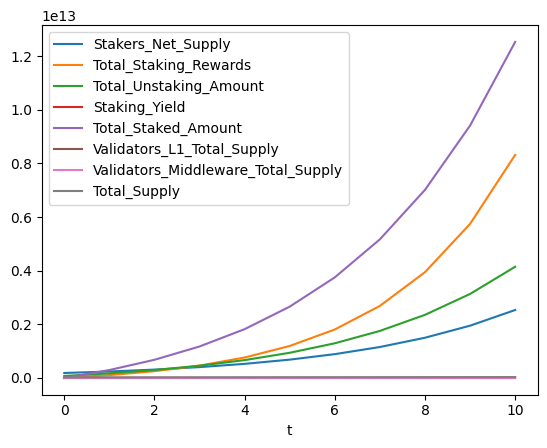

In [138]:
data = bull_results.variables.OHM
ax = data.plot()

## Bear Market

In [ ]:
# Create and run the model for 10 years with bull market
simulation_duration = 10
market_condition = 'bear' 

parameters = {
    'economic_outlook_scenarios': market_condition,
    'steps': simulation_duration
}

model = OHM(parameters)
bear_results = model.run()

In [142]:
bear_results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 2 keys
'variables': 
    'OHM': DataFrame with 8 variables and 11 rows
'reporters': DataFrame with 1 variable and 1 row
}

In [143]:
bear_results.variables.OHM

,Stakers_Net_Supply,Total_Staking_Rewards,Total_Unstaking_Amount,Staking_Yield,Total_Staked_Amount,Validators_L1_Total_Supply,Validators_Middleware_Total_Supply,Total_Supply
t,,,,,,,,
0,1.837500e+11,0.000000e+00,7.350000e+10,0.000000,0.000000e+00,1.000000e+06,2.000000e+05,2.184000e+10
1,2.009306e+11,8.103375e+10,2.431748e+11,28.806584,2.315250e+11,4.080000e+06,8.160000e+05,2.271360e+10
2,2.197176e+11,1.519221e+11,4.287141e+11,49.388737,4.846976e+11,8.515200e+06,1.703040e+06,2.362214e+10
3,2.402612e+11,2.139352e+11,6.316014e+11,63.601955,7.615418e+11,1.490189e+07,2.980378e+06,2.456703e+10
4,2.627257e+11,2.681842e+11,8.534586e+11,72.912624,1.064271e+12,2.409872e+07,4.819744e+06,2.554971e+10
5,2.872905e+11,3.156413e+11,1.096059e+12,78.477388,1.395305e+12,3.734215e+07,7.468431e+06,2.657170e+10
6,3.141522e+11,3.571568e+11,1.361344e+12,81.206501,1.757291e+12,5.641270e+07,1.128254e+07,2.763457e+10
7,3.435254e+11,3.934745e+11,1.651432e+12,81.814391,2.153123e+12,8.387429e+07,1.677486e+07,2.873995e+10
8,3.756450e+11,4.252452e+11,1.968643e+12,80.860009,2.585965e+12,1.234190e+08,2.468380e+07,2.988955e+10


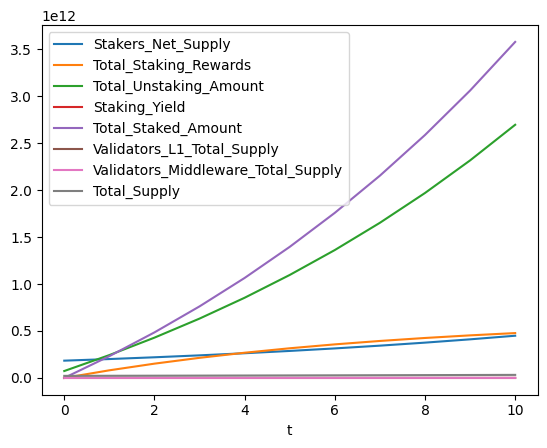

In [144]:
data = results.variables.OHM
ax = data.plot()

## Base Market

In [ ]:
# Create and run the model for 10 years with bull market
simulation_duration = 10
market_condition = 'base' 

parameters = {
    'economic_outlook_scenarios': market_condition,
    'steps': simulation_duration
}

model = OHM(parameters)
base_results = model.run()

In [147]:
base_results

DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 2 keys
'variables': 
    'OHM': DataFrame with 8 variables and 11 rows
'reporters': DataFrame with 1 variable and 1 row
}

In [148]:
base_results.variables.OHM

,Stakers_Net_Supply,Total_Staking_Rewards,Total_Unstaking_Amount,Staking_Yield,Total_Staked_Amount,Validators_L1_Total_Supply,Validators_Middleware_Total_Supply,Total_Supply
t,,,,,,,,
0,1.837500e+11,0.000000e+00,7.350000e+10,0.000000,0.000000e+00,1000000,200000,2.184000e+10
1,2.232562e+11,8.103375e+10,1.628025e+11,25.925926,2.315250e+11,3000000,600000,2.271360e+10
2,2.712563e+11,1.794898e+11,2.713050e+11,47.264137,5.128279e+11,5000000,1000000,2.362214e+10
3,3.295765e+11,2.991138e+11,4.031356e+11,64.826450,8.546109e+11,7000000,1400000,2.456703e+10
4,4.004354e+11,4.444570e+11,5.633098e+11,79.281029,1.269877e+12,9000000,1800000,2.554971e+10
5,4.865290e+11,6.210490e+11,7.579214e+11,91.177801,1.774426e+12,11000000,2200000,2.657170e+10
6,5.911327e+11,8.356083e+11,9.943745e+11,100.969384,2.387452e+12,13000000,2600000,2.763457e+10
7,7.182263e+11,1.096298e+12,1.281665e+12,109.028299,3.132280e+12,15000000,3000000,2.873995e+10
8,8.726449e+11,1.413036e+12,1.630723e+12,115.661152,4.037245e+12,17000000,3400000,2.988955e+10


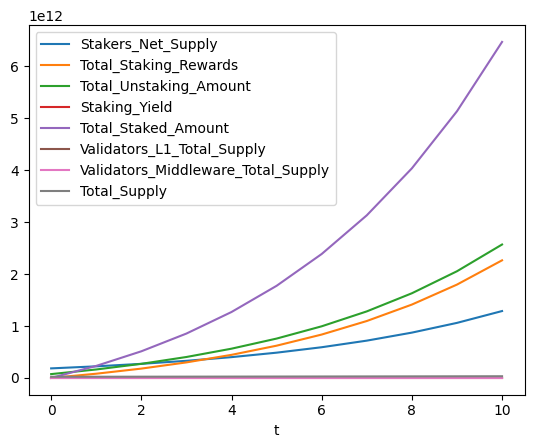

In [149]:
data = base_results.variables.OHM
ax = data.plot()